In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualiztion
%matplotlib inline
import seaborn as sns #sub libraray of matplotlib for visualizatoion


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


### Indian Diabetes ==>

**This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.**

## Task

**We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?**

# Data

**The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on**.

**Pregnancies**: No. of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: outcome (0 or 1)

In [51]:
# read data
data=pd.read_csv("../input/diabetes/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Data Visualization

0    500
1    268
Name: Outcome, dtype: int64


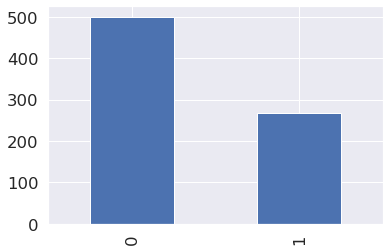

In [52]:
data.Outcome.value_counts().plot(kind="bar")
print(data.Outcome.value_counts())

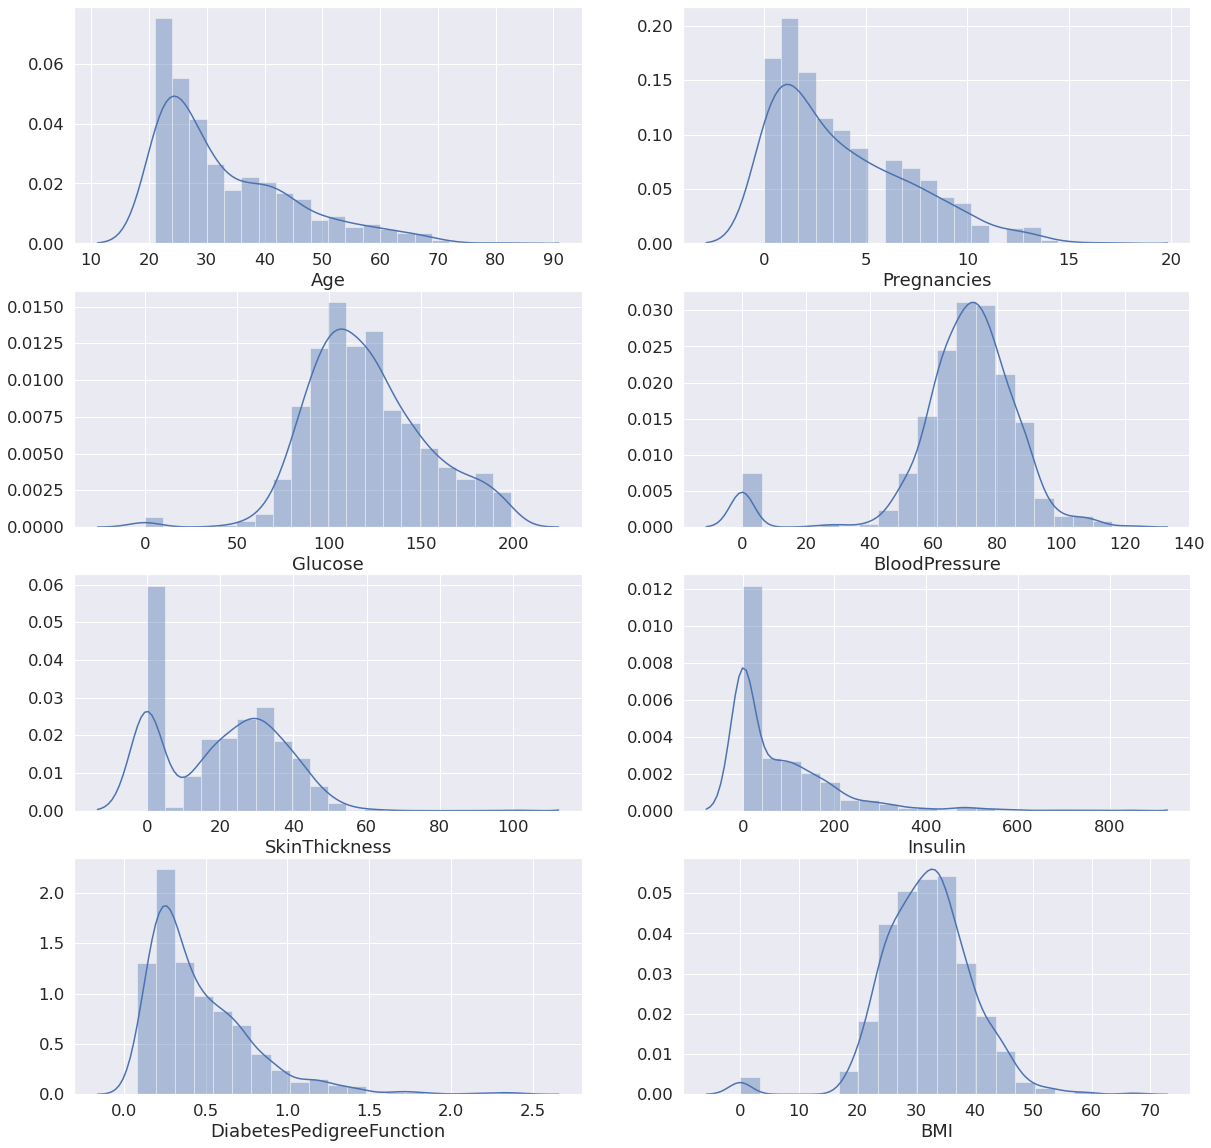

In [53]:
# let's see the distribution of all variable except outcom
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1]) 

### Pair Plots

**Pair plot is used to understand the relationship between two variables. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.**

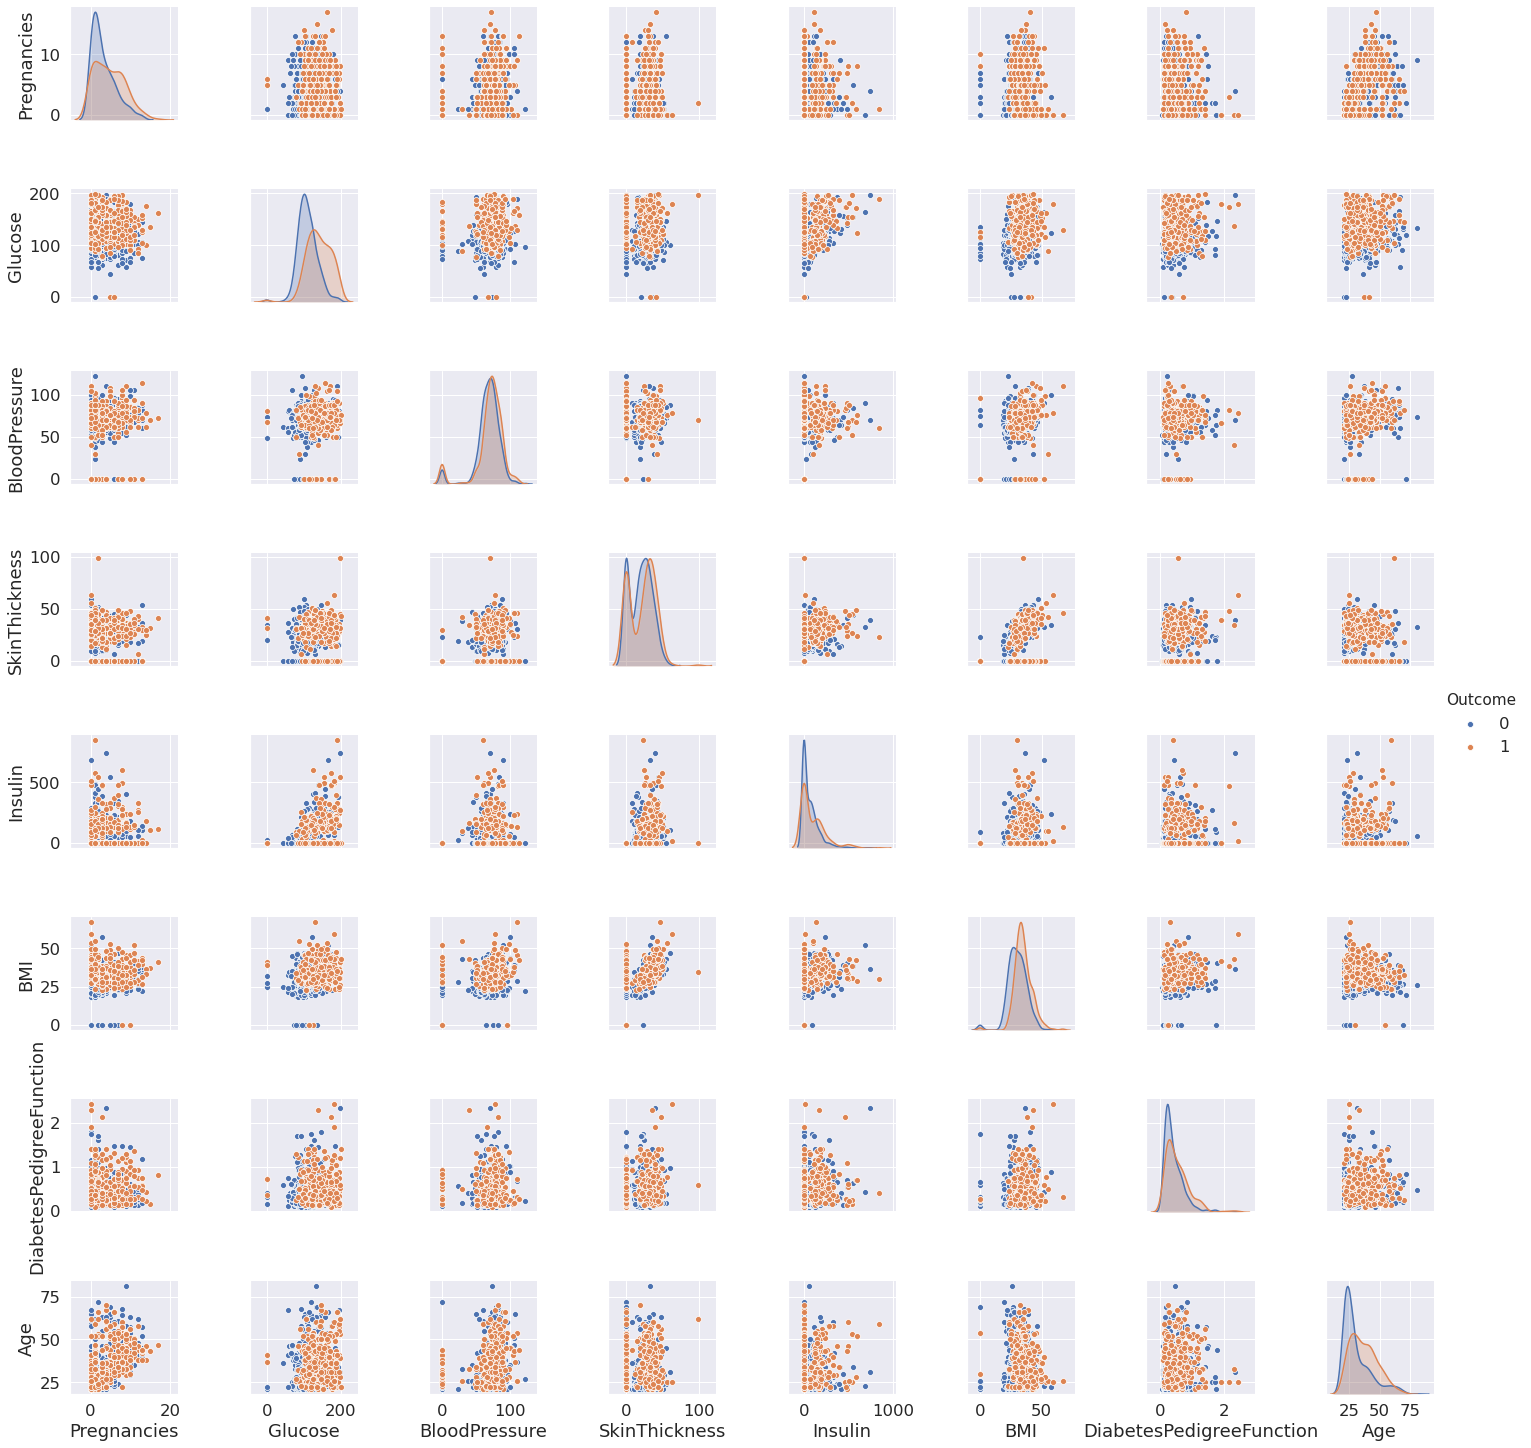

In [54]:
sns.pairplot(data,hue="Outcome")

# Correlation between features

**A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.**

strong positive corrleation = near to +1

strong negative correlation = near to -1

In [55]:
cor=data.corr()

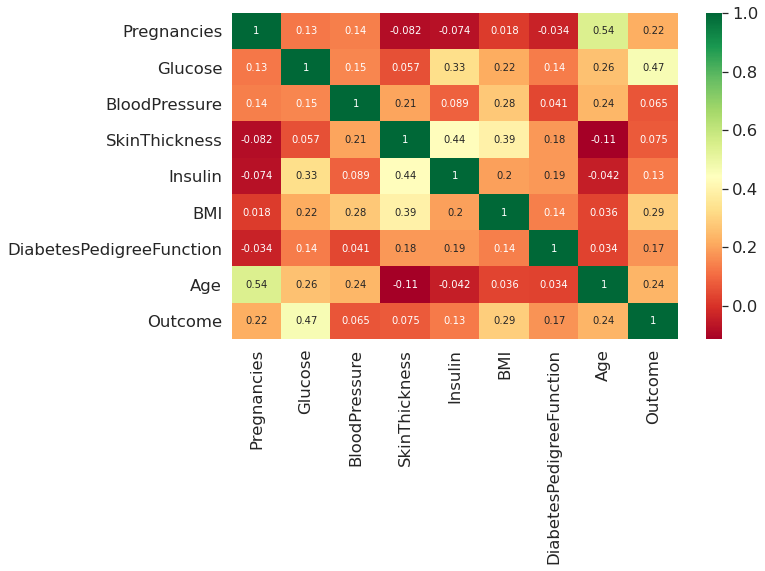

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cmap="RdYlGn")

### Predictive Modeling with different-different models

### devide the data into independent(X) and dependent(Y) variable

In [57]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
x=data.iloc[:,:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [59]:
y=data.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

##### split the data into train and test with 0.75% and 0.25% respectively

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print("75% train data" ,x_train.shape)
print("25% test data" ,x_test.shape)

75% train data (576, 8)
25% test data (192, 8)


## Logistic regression==>

In [62]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") 
from sklearn import metrics
#Model
L_reg = LogisticRegression()

#fit the model
L_reg.fit(x_train, y_train)

#prediction
y_pred = L_reg.predict(x_test)

#Accuracy
print("Accuracy ", metrics.accuracy_score(y_test,y_pred))



Accuracy  0.7916666666666666


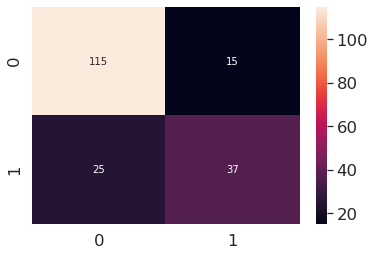

In [63]:
# Plot confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")

### Decision Tree

**Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.**

In [64]:
from sklearn.tree import DecisionTreeClassifier

D_tree = DecisionTreeClassifier(random_state=0)

#fit the model
D_tree.fit(x_train, y_train)

#prediction
y_pred_dt = D_tree.predict(x_test)

#Accuracy
print("Accuracy ", metrics.accuracy_score(y_test,y_pred_dt))


Accuracy  0.71875


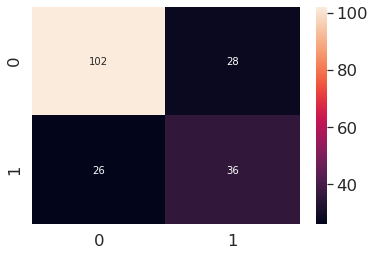

In [65]:
#plot confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## Random Forerst

**Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.**

In [66]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier(random_state=0)

#fit the model
Rf_model.fit(x_train, y_train)

#prediction
y_pred_rf = Rf_model.predict(x_test)

#Accuracy
print("Accuracy ", metrics.accuracy_score(y_test,y_pred_rf))


Accuracy  0.7708333333333334


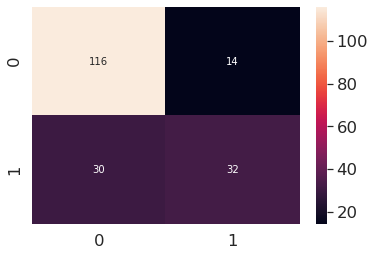

In [67]:
#plot confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [68]:
# check all model accuracy

print("Accuracy Logistic Reg ", metrics.accuracy_score(y_test,y_pred))
print("Accuracy Decission tree ", metrics.accuracy_score(y_test,y_pred_dt))
print("Accuracy Random Forest ", metrics.accuracy_score(y_test,y_pred_rf))

Accuracy Logistic Reg  0.7916666666666666
Accuracy Decission tree  0.71875
Accuracy Random Forest  0.7708333333333334


### If You find this notebook useful, PLEASE UPVOTE ^